<a href="https://colab.research.google.com/github/AnastasiyaKrokhina/lantibiotics/blob/main/lantibiotics_heatmap_2023_09_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heat map

In [1]:
! pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.0 MB/s eta 0:00:00


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# db = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/Lantibiotics_2021-09.fasta')

bee_13 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_13_S00_matches_cyp.tsv', sep='\t', header=None)
bee_20 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_20_S00_matches_cyp.tsv', sep='\t', header=None)
bee_25 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_25_S00_matches_cyp.tsv', sep='\t', header=None)
bee_33 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_33_S00_matches_cyp.tsv', sep='\t', header=None)
bee_41 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_41_S00_matches_cyp.tsv', sep='\t', header=None)
bee_4 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_4_S00_matches_cyp.tsv', sep='\t', header=None)
bee_66 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_66_S00_matches_cyp.tsv', sep='\t', header=None)
bee_75 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_75_S00_matches_cyp.tsv', sep='\t', header=None)

In [3]:
bees_var = [bee_13, bee_20, bee_25, bee_33, bee_41, bee_4, bee_66, bee_75]
bees_names = ['bee_13', 'bee_20', 'bee_25', 'bee_33', 'bee_41', 'bee_4', 'bee_66', 'bee_75']

In [4]:
from Bio import SeqIO
import requests
from io import StringIO

link = "https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/P450_db_12062018.fasta"
data = requests.get(link).text

fasta_iterator = SeqIO.parse(StringIO(data), "fasta")

lantibiotics_id_list = []

# Pretty print the fasta info
for seq in fasta_iterator:
  # print(seq.format("fasta"))
  lantibiotics_id_list.append(seq.id)

name = 'CYP450'

table_data = {f'{name}': [ str(i) for i in lantibiotics_id_list]}

In [32]:
def data_250(df, length=250, col=3):

  filtered_df = df[df[col] >= 250]
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
  return filtered_df


def bee_lantibiotics_data_preparation(bee, nam, df):
  bee = data_250(bee)
  bee = bee.iloc[:, :3].sort_values(by=2).drop_duplicates(subset=[1])

  return df.join(
                 bee[[1, 2]].set_index(1).rename(columns={2: f'{nam}'}),
                 how='outer'
                 )

def make_df_for_heatmap(var, names, table_data, amino_as_name):

  df = pd.DataFrame(table_data).drop_duplicates().set_index(f'{amino_as_name}')
  df.drop_duplicates(subset=[f'{amino_as_name}'], keep='first', inplace=True)

  for be, nam in zip(var, names):
    df = bee_lantibiotics_data_preparation(be, nam, df)

  df.dropna(how='all', subset=df.columns.values[2:], inplace=True)
  return df.fillna(0)

def most_probable_sequence(df):
  df['sum'] = df.sum (axis=1)
  df.sort_values(by='sum', ascending=False, inplace=True)

  pos = len(df.columns) - 1
  df.drop(columns=df.columns[pos], inplace=True)
  return df

def make_plot(df):
  l = len(df.columns)
  num_rows, num_cols = df.iloc[:10, :l].shape
  fig_width = max(10, num_cols * 2)
  fig_height = max(l, num_rows * 0.5)

  f, ax = plt.subplots(figsize=(fig_width, fig_height))
  sns.heatmap(df.iloc[:10, :l], annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")

  plt.show()

<ipython-input-32-b824cf07a200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-32-b824cf07a200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-32-b824cf07a200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipytho

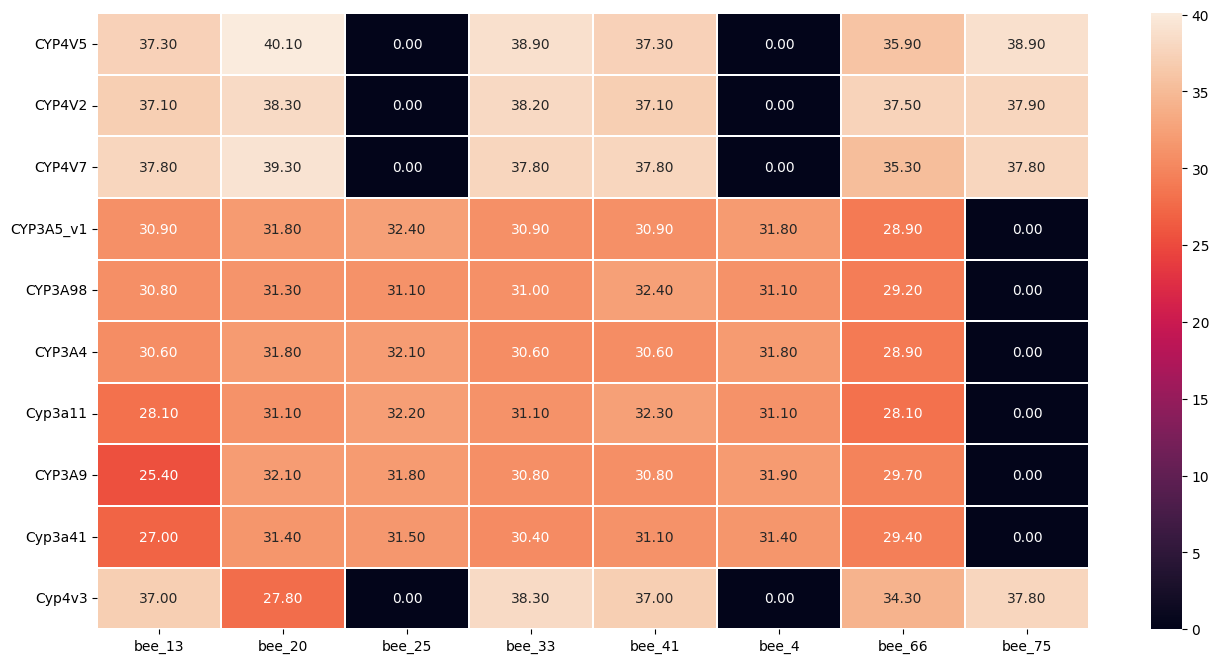

In [33]:
# !!! сделать декоратор !!!

df1 = most_probable_sequence(make_df_for_heatmap(bees_var, bees_names, table_data, name))
make_plot(df1)

<ipython-input-32-b824cf07a200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-32-b824cf07a200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-32-b824cf07a200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipytho

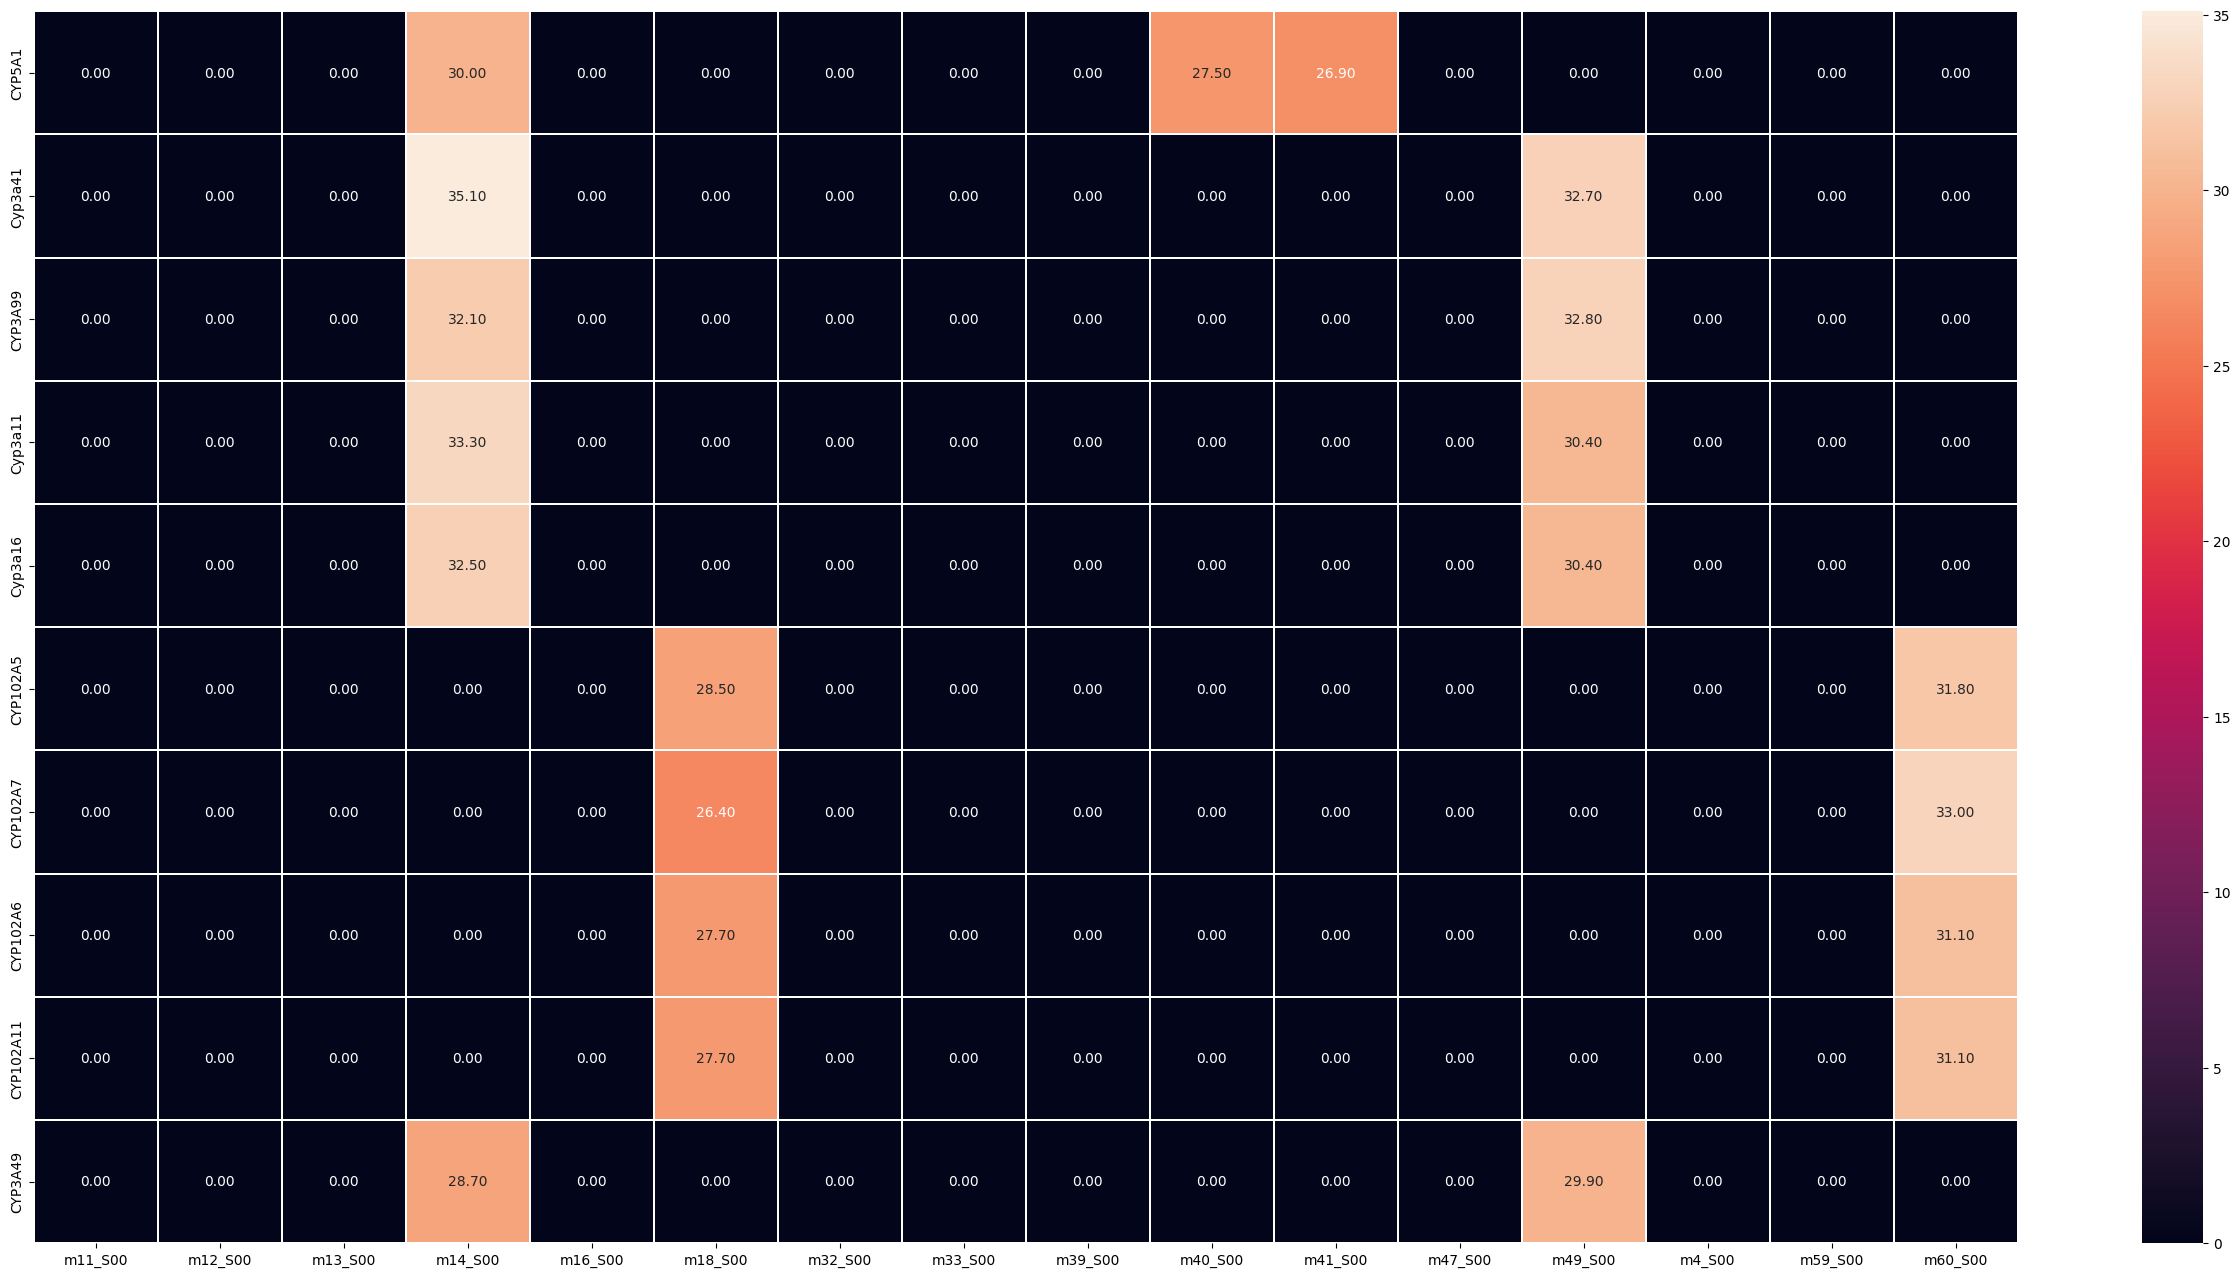

In [34]:
bees3 = [11, 12, 13, 14, 16, 18, 32, 33, 39, 40, 41, 47, 49, 4, 59, 60]

def make_bee3(n):
  return f'https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/cyp450_bee3/m{n}_S00_matches_cyp.tsv'

bees3_dfs = [pd.read_csv(f'{make_bee3(i)}', sep='\t', header=None) for i in bees3]
bees3_names = [f'm{i}_S00' for i in bees3]


df3 = most_probable_sequence(make_df_for_heatmap(bees3_dfs, bees3_names, table_data, name))
make_plot(df3)

In [27]:
def bee_lantibiotics_data_preparation(bee, nam, df):
  bee = data_250(bee)
  bee = bee.iloc[:, :3].sort_values(by=2).drop_duplicates(subset=[1])

  return df.join(
                 bee[[1, 2]].set_index(1).rename(columns={2: f'{nam}'}),
                 how='outer'
                 )


bee_13 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_13_S00_matches_cyp.tsv', sep='\t', header=None)
bee_75 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_75_S00_matches_cyp.tsv', sep='\t', header=None)
df = pd.DataFrame(table_data).set_index(f'{name}')

df_1 = bee_lantibiotics_data_preparation(bee_13, 'bee_13', df).dropna()
# bee_lantibiotics_data_preparation(bee_75, 'bee_75', df_1).dropna(how='all').describe()
df_1

<ipython-input-18-c55765abd4c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)


,bee_13
CYP102A10,32.5
CYP102A10,32.5
CYP102A11,33.8
CYP102A11,33.8
CYP102A12,32.0
...,...
cb25.fpc4023,23.8
cb25.fpc4470,31.5
cb25.fpc4470,31.5
ctg21275,33.3


In [29]:
df

""
CYP450
CYP51G2
CYP51G1
CYP71A12
CYP71A13
CYP71A14
...
CYP35A.f
CYP35A.g
CYP35a.h


<ipython-input-32-b824cf07a200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-32-b824cf07a200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-32-b824cf07a200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipytho

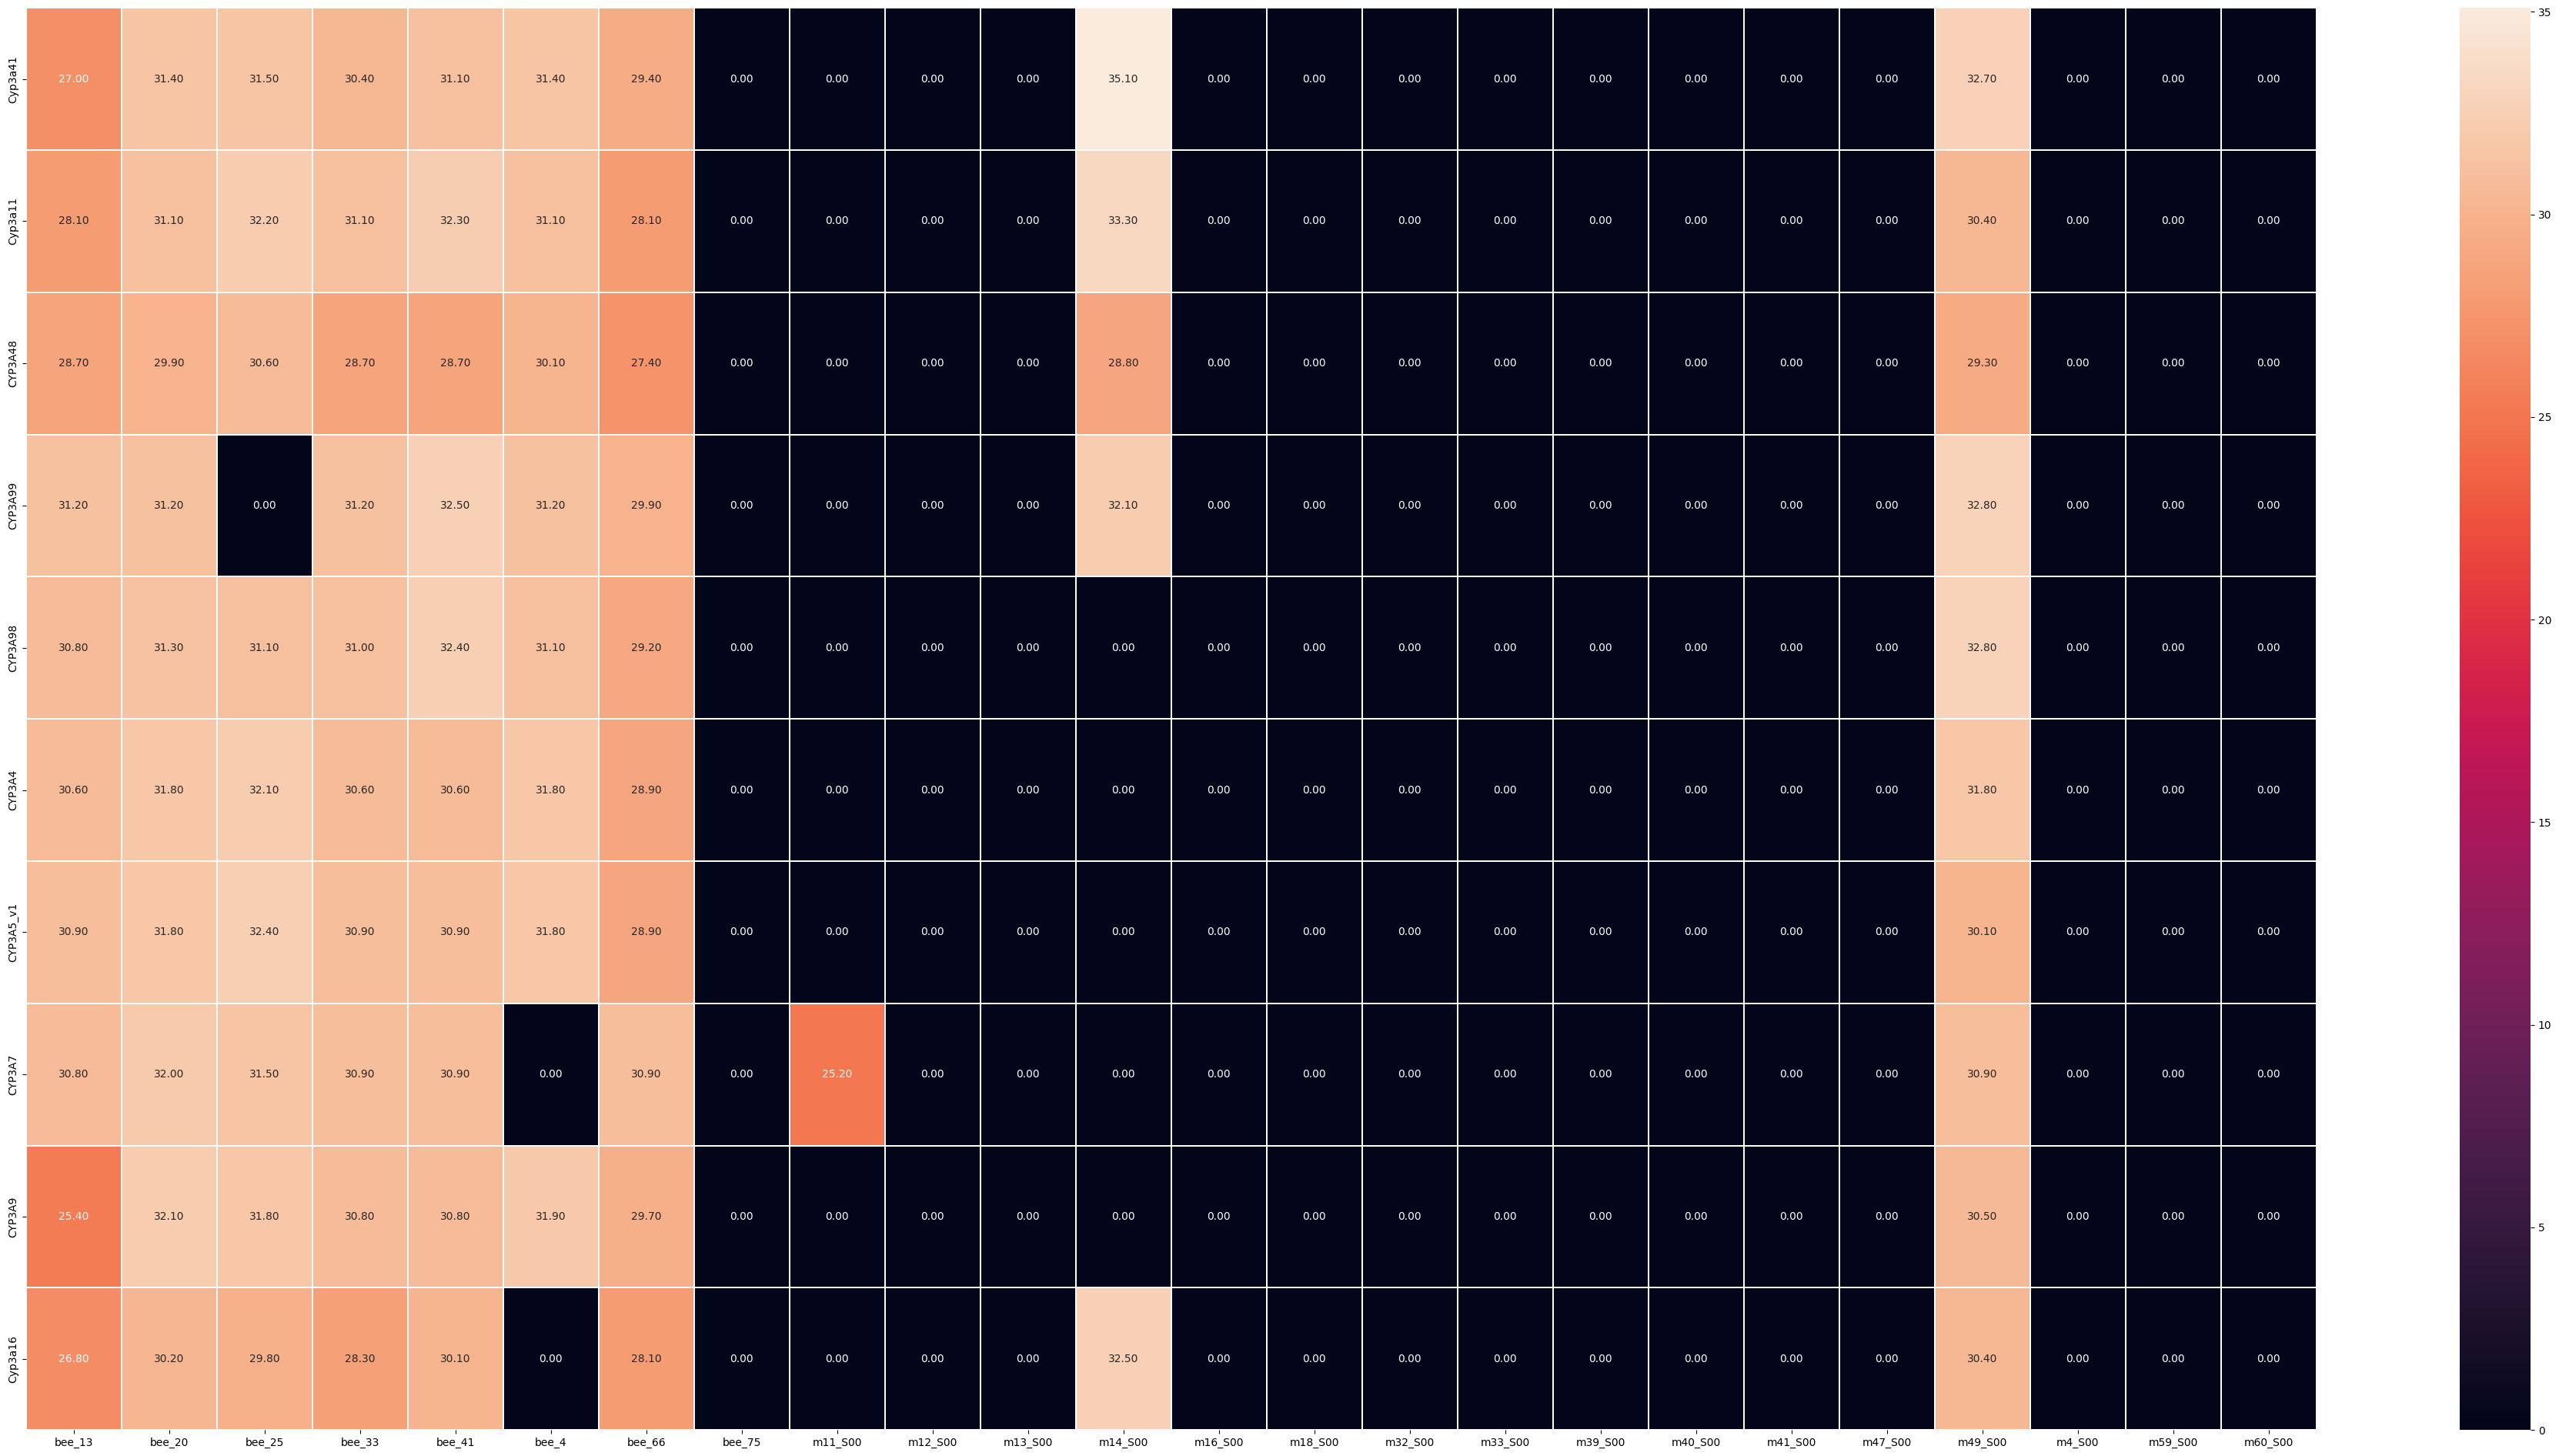

In [39]:
bee_sum_df = bees_var + bees3_dfs


bee_sum_name = bees_names + bees3_names


df_sum = most_probable_sequence(make_df_for_heatmap(bee_sum_df, bee_sum_name, table_data, name))
make_plot(df_sum)